<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/ProjectCuoiKi_ThaiNguyenLongHai_PredictAge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib. pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow. keras.preprocessing import image
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import RMSprop 
from keras.models import Sequential
from sklearn.metrics import accuracy_score #Do Luong
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
image_generator = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

train_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                    directory ="/content/drive/MyDrive/Dataset_Hai_2023/training",
                                                    shuffle = True,
                                                    target_size = (150,150),
                                                    subset = "training",
                                                    class_mode ='categorical')
validation_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                    directory ="/content/drive/MyDrive/Dataset_Hai_2023/validation",
                                                    shuffle = True,
                                                    target_size = (150,150),
                                                    subset = "validation",
                                                    class_mode ='categorical')
train_dataset.class_indices

Found 19122 images belonging to 12 classes.
Found 2378 images belonging to 12 classes.


{'12-17 age': 0,
 '18-22 age': 1,
 '23-27 age': 2,
 '28-32 age': 3,
 '33-37 age': 4,
 '38-42 age': 5,
 '43-47 age': 6,
 '48-52 age': 7,
 '53-57 age': 8,
 '58-65 age': 9,
 '65_Over age': 10,
 'Under 12 age': 11}

In [ ]:
model = Sequential()

#Group 01
model.add(Conv2D(32,(3,3), padding = 'same', kernel_initializer = 'he_normal', input_shape =(150,150,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.2))

# Group 2
model.add(Conv2D(64,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.2))

# Group 3
model.add(Conv2D(128,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.2))

# Group 4
model.add(Conv2D(256,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.2))




In [ ]:
model.add(Flatten())
# Group 5
model.add(Dense(64,kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Group 6
model.add(Dense(64,kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Group 7
model.add(Dense(12,kernel_initializer = 'he_normal'))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        1

In [ ]:
model.compile(loss ='mse', optimizer = RMSprop(), metrics = ['accuracy'])
history = model.fit(train_dataset ,batch_size=128, epochs=50,validation_data = validation_dataset)

Epoch 1/50
598/598 [==============================] - 5291s 9s/step - loss: 0.0797 - accuracy: 0.2132 - val_loss: 0.0664 - val_accuracy: 0.3082
Epoch 2/50
598/598 [==============================] - 103s 173ms/step - loss: 0.0684 - accuracy: 0.3108 - val_loss: 0.0631 - val_accuracy: 0.3389
Epoch 3/50
598/598 [==============================] - 102s 170ms/step - loss: 0.0636 - accuracy: 0.3561 - val_loss: 0.0632 - val_accuracy: 0.3490
Epoch 4/50
598/598 [==============================] - 103s 172ms/step - loss: 0.0617 - accuracy: 0.3779 - val_loss: 0.0640 - val_accuracy: 0.3511
Epoch 5/50
598/598 [==============================] - 101s 170ms/step - loss: 0.0604 - accuracy: 0.3954 - val_loss: 0.0619 - val_accuracy: 0.3600
Epoch 6/50
598/598 [==============================] - 108s 180ms/step - loss: 0.0594 - accuracy: 0.4059 - val_loss: 0.0627 - val_accuracy: 0.3612
Epoch 7/50
598/598 [==============================] - 100s 168ms/step - loss: 0.0591 - accuracy: 0.4093 - val_loss: 0.0594 - v

In [ ]:
# Do Chinh Xac Mo Hinh
score = model.evaluate(train_dataset,verbose = 0)
print('Sai so kiem tra:' , score[0])
print('Do chinh xac kiem tra:' , score[1])

Sai so kiem tra: 0.015228374861180782
Do chinh xac kiem tra: 0.8615207672119141


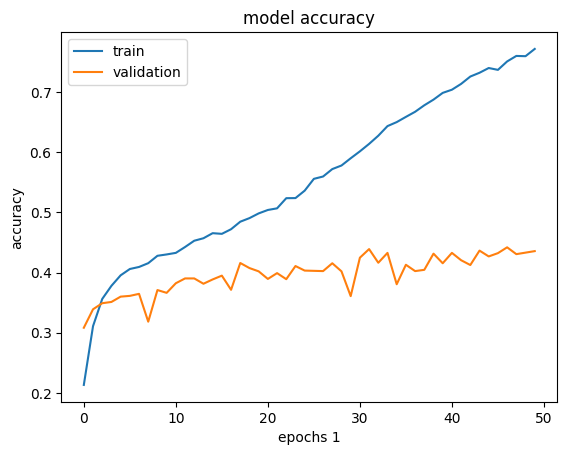

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs 1')
plt.legend(['train','validation'])
plt.show()


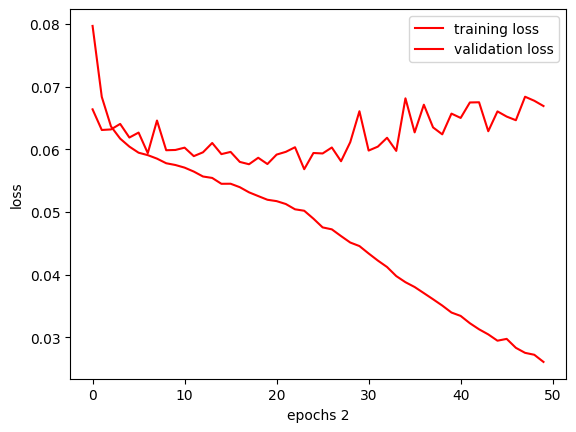

In [ ]:
plt.plot(history.history['loss'], 'r', label ='training loss')
plt.plot(history.history['val_loss'], 'r', label ='validation loss')
plt.xlabel('epochs 2')
plt.ylabel('loss')
plt.legend()
plt.show()


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/Age_Predict_People.h5')

1/1 [==============================] - 0s 338ms/step


array(['33-37 age'], dtype='<U12')

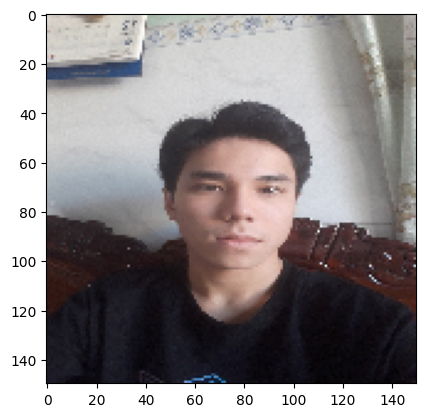

In [ ]:
model_CNN = load_model('/content/drive/MyDrive/Colab Notebooks/Age_Predict_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Anh/Duc.jpg"
predict = ['12-17 age','18-22 age','23-27 age','28-32 age','33-37 age','38-42 age','43-47 age','48-52 age','53-57 age','58-65 age','65_Over age','Under 12 age']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]

1/1 [==============================] - 0s 410ms/step


array(['23-27 age'], dtype='<U12')

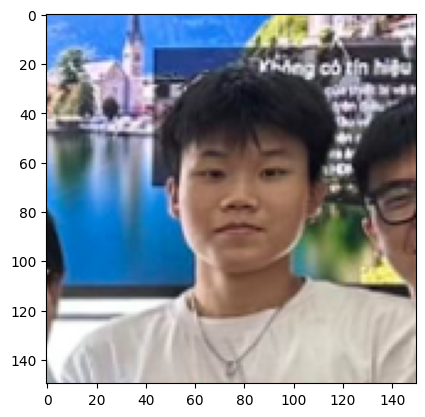

In [ ]:
model_CNN = load_model('/content/drive/MyDrive/Colab Notebooks/Age_Predict_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Anh/Hieu.jpg"
predict = ['12-17 age','18-22 age','23-27 age','28-32 age','33-37 age','38-42 age','43-47 age','48-52 age','53-57 age','58-65 age','65_Over age','Under 12 age']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]

1/1 [==============================] - 0s 225ms/step


array(['12-17 age'], dtype='<U12')

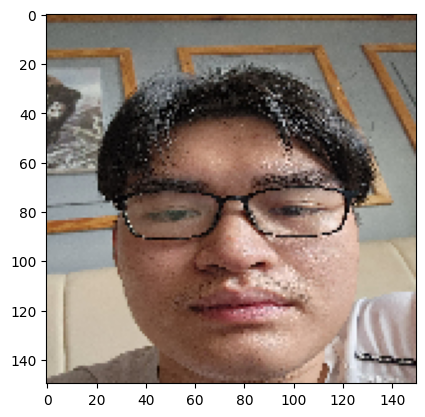

In [ ]:
model_CNN = load_model('/content/drive/MyDrive/Colab Notebooks/Age_Predict_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Anh/Hai.jpg"
predict = ['12-17 age','18-22 age','23-27 age','28-32 age','33-37 age','38-42 age','43-47 age','48-52 age','53-57 age','58-65 age','65_Over age','Under 12 age']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]

1/1 [==============================] - 0s 302ms/step


array(['28-32 age'], dtype='<U12')

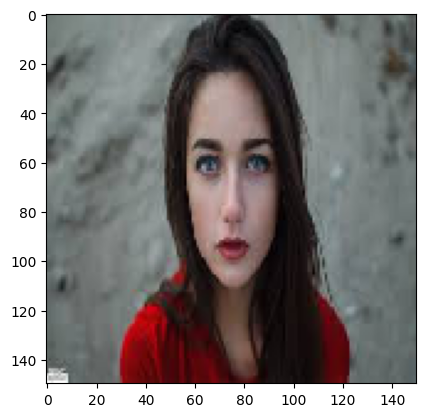

In [ ]:
model_CNN = load_model('/content/drive/MyDrive/Colab Notebooks/Age_Predict_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Anh/images.jpg"
predict = ['12-17 age','18-22 age','23-27 age','28-32 age','33-37 age','38-42 age','43-47 age','48-52 age','53-57 age','58-65 age','65_Over age','Under 12 age']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]